In [14]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder\
    .master("local[*]")\
        .appName("PySpark Tutorial 4 Session 2")\
        .getOrCreate()

22/11/23 16:08:37 WARN Utils: Your hostname, Husnus-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 172.20.10.3 instead (on interface en9)
22/11/23 16:08:37 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/23 16:08:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
stock_csv = "../data/stocks_price_final.csv"

In [18]:
#import pandas as pd
#pd.read_csv(stock_csv)

df = spark.read.csv(stock_csv,header=True,inferSchema=True)

In [19]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [8]:
from pyspark.sql.types import *

In [9]:
data_schema = [
    StructField("_c0", IntegerType(), True),
    StructField("symbol",StringType(), True)
    ,StructField("date",DateType(), True)
    ,StructField("open",DoubleType(), True)    
    ,StructField("high",DoubleType(), True)    
    ,StructField("low",DoubleType(), True)    
    ,StructField("close",DoubleType(), True)        
    ,StructField("volume",IntegerType(), True)        
    ,StructField("adjusted",DoubleType(), True)            
    ,StructField("market.cap",StringType(), True)                
    ,StructField("sector",StringType(), True)                
    ,StructField("industry",StringType(), True)                    
    ,StructField("exchange",StringType(), True)                        
]

row_structu = StructType(fields=data_schema)

In [10]:
#import pandas as pd
#pd.read_csv(stock_csv)

df = spark.read.csv(stock_csv,header=True, schema=row_structu)

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [24]:
df.head(3)

22/11/23 16:08:22 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


[Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', date=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', date=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [25]:
df.first()

22/11/23 16:08:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


Row(_c0=1, symbol='TXG', date=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market.cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [26]:
df.show()

22/11/23 16:08:23 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-1

In [27]:
#select count(1) from (select * from large_table) foo

#select count(1)  from large_table

In [28]:
df.describe().show(vertical=True, truncate=False)

22/11/23 16:08:25 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


In [ ]:
df.count()

In [ ]:
df.distinct().count()

In [ ]:
df.drop("_c0").distinct().count()

In [ ]:
df1 = df.drop("_c0")

In [ ]:
df1.show()

In [ ]:
df.show()

In [ ]:
df.withColumn("mid", (df.high + df.low)/2)\
  .withColumn("is_drop", df.open > df.close)\
  .withColumnRenamed("open","open_price")\
  .drop("sector")\
    .head()

In [ ]:
df.withColumnRenamed("market.cap","market_cap")\
    .na.drop().show()

In [ ]:
df.withColumnRenamed("market.cap","market_cap")\
    .na.fill(0).show()

In [ ]:
df.select("open","close","symbol","date").show()

In [ ]:
df.select("open","close","symbol","date")\
    .filter( (df.high > 54) & (df.high < 61) ).show(n=3)

In [ ]:
df.select("open","close","symbol","date")\
    .filter( df.high.between(55,60) ).show(n=3)

In [ ]:
from pyspark.sql import functions as f

df.select("open"
,"close"
, f.when(df.close >= 61, 1).otherwise(0).alias("Some Condition Eval") )\
    .show(n=5)

In [ ]:
df.select("industry"
, df.industry.rlike('^[B,C]').alias("is_interesting"))\
    .distinct()\
    .show(n=5)

In [ ]:
df.groupBy("industry")\
    .agg(
        f.min("date").alias("MinDate")
        , f.max("date").alias("MaxDate")
        , f.min("open").alias("MinOpen")
        , f.min("open").alias("MaxOpen")

    )\
    .show(5)

In [ ]:
all_cols_but_one = [c for c in df.columns if c not in ('industry', 'market.cap')]
all_cols_but_one

In [ ]:
from typing import List


all_min = [f.min(c).alias(f"Min{c.title()}") for c in all_cols_but_one]
all_max = [f.max(c).alias(f"Max{c.title()}") for c in all_cols_but_one]

from typing import List
def interleave(l1:List, l2:List) -> List:
        result = []
        for mn,mx in zip(all_min,all_max):
                result.append(mn)
                result.append(mx)

        return result

all_aggs = interleave(all_min, all_max)

df.groupBy("industry").agg(*all_aggs).show(vertical=True,n=1)

In [ ]:
from itertools import groupby


df.dtypes

def cool_agg(df, groupby:str, exclude_columns:List[str]=[]):

    aggs = []

    for cn,ct in df.dtypes:
        if cn == groupby or cn in exclude_columns:
            continue
        
        aggs.append(f.min(cn).alias(f"Min{cn.title()}"))
        aggs.append(f.max(cn).alias(f"Max{cn.title()}"))
        
        if ct in ('int','double'):
            aggs.append(f.sum(cn).alias(f"Sum{cn.title()}"))
            aggs.append(f.mean(cn).alias(f"Mean{cn.title()}"))
            aggs.append(f.stddev(cn).alias(f"Stddev{cn.title()}"))

    return df.groupBy(groupby).agg(*aggs)
            


In [ ]:
cool_agg(df, "sector",exclude_columns=['market.cap']).show(n=1,vertical=True)

In [ ]:
df.select("industry","open","close","adjusted")\
    .groupBy("industry") \
    .mean()\
    .show(5)

In [15]:
df_pandas = df.select("industry", "open").filter(df.sector == 'Technology').sample(0.01).toPandas()

In [16]:
df_pandas

,industry,open
0,"Computer Software: Programming, Data Processing",7.93
1,"Computer Software: Programming, Data Processing",7.59
2,"Computer Software: Programming, Data Processing",8.26
3,"Computer Software: Programming, Data Processing",12.00
4,"Computer Software: Programming, Data Processing",15.77
...,...,...
2332,Computer Software: Prepackaged Software,14.55
2333,Computer Software: Prepackaged Software,14.47
2334,Computer Software: Prepackaged Software,14.35
2335,Computer Software: Prepackaged Software,10.61


array([[<AxesSubplot: title={'center': 'Advertising'}>,
        <AxesSubplot: title={'center': 'Computer Communications Equipment'}>,
        <AxesSubplot: title={'center': 'Computer Manufacturing'}>,
        <AxesSubplot: title={'center': 'Computer Software: Prepackaged Software'}>],
       [<AxesSubplot: title={'center': 'Computer Software: Programming, Data Processing'}>,
        <AxesSubplot: title={'center': 'Computer peripheral equipment'}>,
        <AxesSubplot: title={'center': 'Diversified Commercial Services'}>,
        <AxesSubplot: title={'center': 'EDP Services'}>],
       [<AxesSubplot: title={'center': 'Electrical Products'}>,
        <AxesSubplot: title={'center': 'Electronic Components'}>,
        <AxesSubplot: title={'center': 'Industrial Machinery/Components'}>,
        <AxesSubplot: title={'center': 'Professional Services'}>],
       [<AxesSubplot: title={'center': 'Radio And Television Broadcasting And Communications Equipment'}>,
        <AxesSubplot: title={'cent

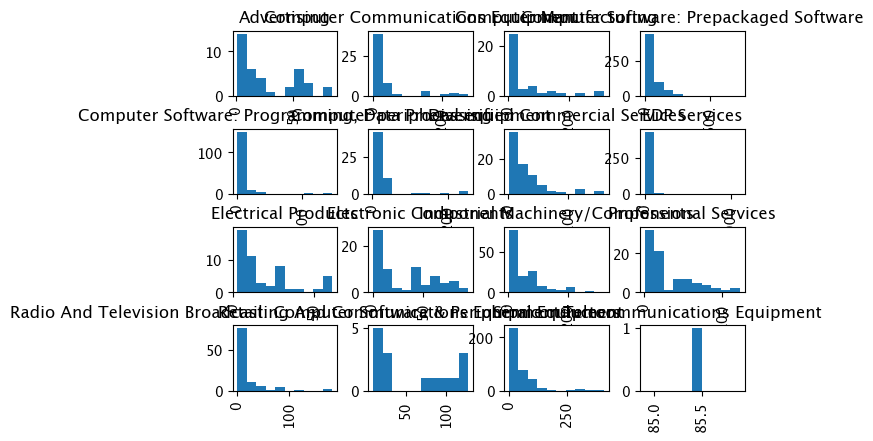

In [17]:
df_pandas.hist("open",by="industry")

In [19]:
sql = """
select * from 
(select s.*
    , row_number() over(partition by symbol order by date desc) as rn 
 from stock s) where rn = 1;
"""

print(sql)


select * from 
(select s.*
    , row_number() over(partition by symbol order by date desc) as rn 
 from stock s) where rn = 1;



In [20]:
df.registerTempTable("stock")

/Users/husnusensoy/miniconda39/envs/python-training38/lib/python3.8/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [26]:
spark.sql("""
select * from
(select s.*
    , row_number() over(partition by symbol order by date desc) as rn 
 from stock s) where rn = 1 order by symbol
""").drop("rn").show()

22/11/23 16:16:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


+-------+------+----------+----------+----------+----------+----------+--------+----------+----------+--------------------+--------------------+--------+
|    _c0|symbol|      date|      open|      high|       low|     close|  volume|  adjusted|market.cap|              sector|            industry|exchange|
+-------+------+----------+----------+----------+----------+----------+--------+----------+----------+--------------------+--------------------+--------+
|1015730|     A|2020-07-22| 96.360001| 96.879997| 95.809998| 96.349998| 1313200| 96.349998|   $29.75B|       Capital Goods|Biotechnology: La...|    NYSE|
|1019668|    AA|2020-07-22|     13.05|    13.385|      13.0|     13.07| 4857300|     13.07|    $2.43B|    Basic Industries|            Aluminum|    NYSE|
|  93084|  AACG|2020-07-22|      1.29|      1.35|      1.17|      1.29|   38100|      1.29|   $40.94M|   Consumer Services|Other Consumer Se...|  NASDAQ|
|  56544|   AAL|2020-07-22|     11.38|     11.67|      11.3|     11.36|42175

In [28]:
spark.sql("""
select * from stock where open is null
""").show(n=3)

22/11/23 16:18:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv
+----+------+----------+----+----+----+-----+------+--------+----------+-------------+--------------------+--------+
| _c0|symbol|      date|open|high| low|close|volume|adjusted|market.cap|       sector|            industry|exchange|
+----+------+----------+----+----+----+-----+------+--------+----------+-------------+--------------------+--------+
|4378|  KRKR|2020-05-11|null|null|null| null|  null|    null|  $130.48M|Miscellaneous|   Business Services|  NASDAQ|
|5747|  NMTR|2020-01-23|null|null|null| null|  null|    null|   $54.96M|  Health Care|Major Pharmaceu

In [29]:
glb = spark.sql("select avg(open) as v from stock")

per_symbol = spark.sql("select symbol,avg(open) as v from stock group by 1")

In [30]:
glb.head()

Row(v=15070.071703341047)

In [31]:
per_symbol.head()

Row(symbol='ALXN', v=112.74596935459172)

In [34]:
glb.registerTempTable("glb")
per_symbol.registerTempTable("per_symbol")

/Users/husnusensoy/miniconda39/envs/python-training38/lib/python3.8/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [36]:
imputed = spark.sql("""
select s.*, (a.v + b.v)/2 as open_i from stock s join per_symbol a using(symbol)
cross join glb b
"""
)

In [38]:
imputed.filter(imputed.open.isNull()).show()

22/11/23 16:24:36 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


+------+------+----------+----+----+----+-----+------+--------+----------+-----------------+--------------------+--------+-----------------+
|symbol|   _c0|      date|open|high| low|close|volume|adjusted|market.cap|           sector|            industry|exchange|           open_i|
+------+------+----------+----+----+----+-----+------+--------+----------+-----------------+--------------------+--------+-----------------+
|  ATCX| 97436|2020-02-14|null|null|null| null|  null|    null|   $46.48M|Consumer Services|Professional Serv...|  NASDAQ|7539.717430374228|
|  ATCX| 97435|2020-02-13|null|null|null| null|  null|    null|   $46.48M|Consumer Services|Professional Serv...|  NASDAQ|7539.717430374228|
|  ATCX| 97434|2020-02-12|null|null|null| null|  null|    null|   $46.48M|Consumer Services|Professional Serv...|  NASDAQ|7539.717430374228|
|  ATCX| 97433|2020-02-11|null|null|null| null|  null|    null|   $46.48M|Consumer Services|Professional Serv...|  NASDAQ|7539.717430374228|
|  ATCX| 9743

In [41]:
instances = spark.sql("""select symbol
, date as tick_date
, open
, _c0 as id
, lag(open,1) over(partition by symbol order by date) as open_1
, lag(open,2) over(partition by symbol order by date) as open_2
, lag(open,3) over(partition by symbol order by date) as open_3
, lag(open,4) over(partition by symbol order by date) as open_4

from stock
""").na.drop()

In [43]:
instances.show()

22/11/23 16:30:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


+------+----------+---------+-------+---------+---------+---------+---------+
|symbol| tick_date|     open|     id|   open_1|   open_2|   open_3|   open_4|
+------+----------+---------+-------+---------+---------+---------+---------+
|    AA|2019-01-08|    28.73|1019281|28.530001|    26.84|26.120001|   25.955|
|    AA|2019-01-09|     28.6|1019282|    28.73|28.530001|    26.84|26.120001|
|    AA|2019-01-10|28.690001|1019283|     28.6|    28.73|28.530001|    26.84|
|    AA|2019-01-11|28.719999|1019284|28.690001|     28.6|    28.73|28.530001|
|    AA|2019-01-14|29.059999|1019285|28.719999|28.690001|     28.6|    28.73|
|    AA|2019-01-15|28.940001|1019286|29.059999|28.719999|28.690001|     28.6|
|    AA|2019-01-16|29.190001|1019287|28.940001|29.059999|28.719999|28.690001|
|    AA|2019-01-17|28.209999|1019288|29.190001|28.940001|29.059999|28.719999|
|    AA|2019-01-18|    29.92|1019289|28.209999|29.190001|28.940001|29.059999|
|    AA|2019-01-22|     29.0|1019290|    29.92|28.209999|29.1900

In [44]:
training = instances.filter(instances.tick_date < '2020-07-01')
test = instances.filter(instances.tick_date > '2020-07-01')

In [45]:
training.show(n=3)

22/11/23 16:31:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


+------+----------+---------+-------+---------+---------+---------+---------+
|symbol| tick_date|     open|     id|   open_1|   open_2|   open_3|   open_4|
+------+----------+---------+-------+---------+---------+---------+---------+
|    AA|2019-01-08|    28.73|1019281|28.530001|    26.84|26.120001|   25.955|
|    AA|2019-01-09|     28.6|1019282|    28.73|28.530001|    26.84|26.120001|
|    AA|2019-01-10|28.690001|1019283|     28.6|    28.73|28.530001|    26.84|
+------+----------+---------+-------+---------+---------+---------+---------+
only showing top 3 rows



In [46]:
test.show(n=3)

22/11/23 16:31:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


+------+----------+-----+-------+------+------+------+------+
|symbol| tick_date| open|     id|open_1|open_2|open_3|open_4|
+------+----------+-----+-------+------+------+------+------+
|    AA|2020-07-02|11.26|1019655| 11.18| 10.84| 11.04| 11.61|
|    AA|2020-07-06|11.35|1019656| 11.26| 11.18| 10.84| 11.04|
|    AA|2020-07-07|11.23|1019657| 11.35| 11.26| 11.18| 10.84|
+------+----------+-----+-------+------+------+------+------+
only showing top 3 rows



In [47]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["open_1","open_2","open_3","open_4"], outputCol="vhist")

In [51]:
va.transform(training).printSchema()

root
 |-- symbol: string (nullable = true)
 |-- tick_date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- id: integer (nullable = true)
 |-- open_1: double (nullable = true)
 |-- open_2: double (nullable = true)
 |-- open_3: double (nullable = true)
 |-- open_4: double (nullable = true)
 |-- vhist: vector (nullable = true)



In [52]:
from pyspark.ml.regression import LinearRegression

In [53]:
lr = LinearRegression(featuresCol="vhist",labelCol="open",predictionCol="open_pred")

In [54]:
lrModel = lr.fit(va.transform(training))

22/11/23 16:35:53 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


22/11/23 16:35:55 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


22/11/23 16:35:57 WARN Instrumentation: [7ecef2e6] regParam is zero, which might cause numerical instability and overfitting.
22/11/23 16:35:58 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/11/23 16:35:58 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


22/11/23 16:36:00 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
22/11/23 16:36:01 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


In [58]:
lrModel.transform(va.transform(test)).registerTempTable("for_scoring")

/Users/husnusensoy/miniconda39/envs/python-training38/lib/python3.8/site-packages/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [63]:
evaluation = spark.sql("""
select symbol, mean(abs(open-open_pred)) mae,  sqrt(mean(power((open-open_pred),2))) as rmse,count(1) as n
from for_scoring 
group by symbol order by 2 desc
""").toPandas()

22/11/23 16:41:19 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open
 Schema: _c0, symbol, date, open
Expected: _c0 but found: 
CSV file: file:///Users/husnusensoy/Documents/code/python-training-2910/week5/data/stocks_price_final.csv


In [64]:
evaluation

,symbol,mae,rmse,n
0,AMZN,80.514379,102.838418,14
1,TSLA,70.567375,95.830963,14
2,NVR,54.075017,65.911797,14
3,SHOP,36.647007,50.959591,14
4,BKNG,33.392324,39.980976,14
...,...,...,...,...
4591,APD,8.792754,9.482909,14
4592,MSCI,8.541996,10.931050,14
4593,ABMD,8.095266,9.634325,14
4594,TREE,8.065437,9.911585,14
